<a href="https://colab.research.google.com/github/doo52oh/Dacon/blob/main/%EB%AC%BC%EB%A5%98_%EC%9C%A0%ED%86%B5%EB%9F%89_%EC%98%88%EC%B8%A1/%EB%AC%BC%EB%A5%98_%EC%9C%A0%ED%86%B5%EB%9F%89_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,475 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

# 물류 유통량 예측 경진대회

* index : 인덱스
* SEND_SPG_INNB : 송하인_격자공간고유번호
* REC_SPG_INNB : 수하인 격자공간고유번호
* DL_GD_LCLS_NM : 카테고리_대
* DL_GD_MCLS_NM : 카테고리_중
* INVC_CONT : 운송장 건 수


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# pd.set_option('display.max_rows', None) 

plt.rc('font', family='NanumBarunGothic') 

In [ ]:


train = pd.read_csv('train_df.csv',encoding = 'cp949')
test = pd.read_csv('test_df.csv',encoding = 'cp949')

submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [ ]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4640 non-null   int64 
 1   SEND_SPG_INNB  4640 non-null   int64 
 2   REC_SPG_INNB   4640 non-null   int64 
 3   DL_GD_LCLS_NM  4640 non-null   object
 4   DL_GD_MCLS_NM  4640 non-null   object
dtypes: int64(3), object(2)
memory usage: 181.4+ KB


In [ ]:
train.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
INVC_CONT        0
dtype: int64

In [ ]:
test.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
dtype: int64

# EDA

데이터 수 확인

In [ ]:
train.SEND_SPG_INNB.value_counts()

5011000078068400    4227
5013000610049100    1994
5013000731055200    1335
5011000137030100    1206
5013000821028200     773
                    ... 
5011000263040400       1
5011000595029400       1
4833000396037100       1
5011000172003300       1
2623000016044400       1
Name: SEND_SPG_INNB, Length: 3684, dtype: int64

In [ ]:
train.REC_SPG_INNB.value_counts()

5011000543041100    31
5011000596012200    27
5013000635005300    24
5011000544072300    20
5011000318044100    20
                    ..
4615000058100300     1
4413300195016200     1
4827000664030200     1
1168000027057100     1
2726000056072100     1
Name: REC_SPG_INNB, Length: 27826, dtype: int64

In [ ]:
train.DL_GD_LCLS_NM.value_counts()

식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: DL_GD_LCLS_NM, dtype: int64

In [ ]:
a = train['REC_SPG_INNB'].groupby(train['DL_GD_LCLS_NM'])
a.size().sort_values(ascending=False)

DL_GD_LCLS_NM
식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: REC_SPG_INNB, dtype: int64

In [ ]:
a.nunique().sort_values(ascending=False)

DL_GD_LCLS_NM
식품        25197
생활/건강      1818
여행/문화      1060
패션의류        537
디지털/가전      231
화장품/미용      207
Name: REC_SPG_INNB, dtype: int64

In [ ]:
M = train['REC_SPG_INNB'].groupby(train['DL_GD_MCLS_NM'])
M.size().sort_values(ascending=False)

DL_GD_MCLS_NM
농산물          22162
문화컨텐츠         1192
음료            1126
수산             931
가공식품           923
기타식품           766
건강식품           651
음반             635
축산             418
냉동/간편조리식품      413
반려동물           358
과자             348
생활용품           343
주방용품           328
상의             321
기타패션의류         261
기타디지털/가전       241
스킨케어           227
문구/사무용품        180
건강용품           176
Name: REC_SPG_INNB, dtype: int64

In [ ]:
M.nunique().sort_values(ascending=False)

DL_GD_MCLS_NM
농산물          20646
음료            1088
문화컨텐츠         1060
수산             924
가공식품           850
기타식품           756
음반             635
건강식품           608
축산             412
냉동/간편조리식품      406
과자             342
반려동물           335
생활용품           328
주방용품           304
상의             301
기타패션의류         244
기타디지털/가전       231
스킨케어           207
문구/사무용품        167
건강용품           166
Name: REC_SPG_INNB, dtype: int64

### 상품별 수신횟수

In [ ]:
train['cate'] = train['DL_GD_LCLS_NM'] + '_' + train['DL_GD_MCLS_NM']
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,cate
0,0,1129000014045300,5011000220046300,패션의류,상의,3,패션의류_상의
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,생활/건강_반려동물
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,패션의류_기타패션의류
3,3,1154500002014200,5011000315087400,식품,농산물,10,식품_농산물
4,4,1165000021008300,5011000177051200,식품,가공식품,3,식품_가공식품


In [ ]:
c =  train.pivot_table(values='INVC_CONT', index = 'cate', aggfunc=sum).reset_index().sort_values(by = 'INVC_CONT', ascending=False)
c.head()

,cate,INVC_CONT
12,식품_농산물,95239
14,식품_음료,6469
7,식품_가공식품,6283
16,여행/문화_문화컨텐츠,5911
13,식품_수산,5258


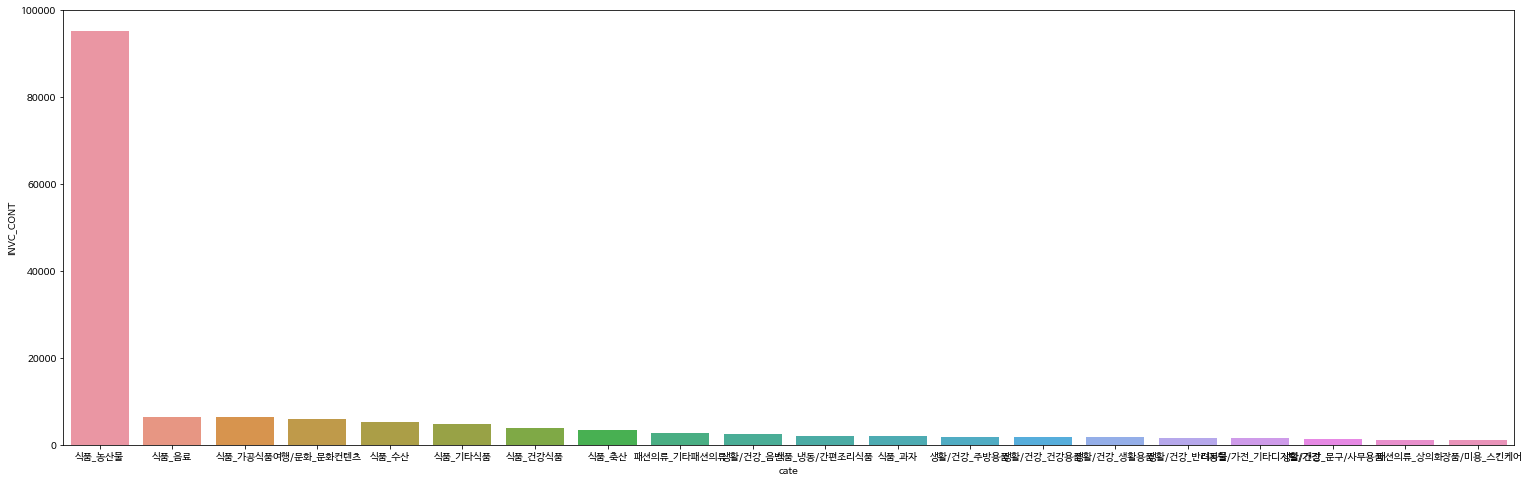

In [ ]:
plt.figure(figsize=(26,8))
sns.barplot(data = c, x = 'cate', y = 'INVC_CONT')

# 지역별 상품 수신횟수

In [ ]:
r =  train.pivot_table(values='INVC_CONT', columns= 'cate',index = ['REC_SPG_INNB'], aggfunc=sum).fillna(0)
r

# 데이터 전처리

In [ ]:
train['REC_SPG_INNB_2'] = train['REC_SPG_INNB'].apply(lambda x: 'C' + '_' + str(x) if type(x) == int else x)
train['SEND_SPG_INNB_2'] = train['SEND_SPG_INNB'].apply(lambda x: 'C' + '_' + str(x) if type(x) == int else x)

test['REC_SPG_INNB_2'] = test['REC_SPG_INNB'].apply(lambda x: 'C' + '_' + str(x) if type(x) == int else x)
test['SEND_SPG_INNB_2'] = test['SEND_SPG_INNB'].apply(lambda x: 'C' + '_' + str(x) if type(x) == int else x)

# train['cate'] = train['DL_GD_LCLS_NM'] + '_' + train['DL_GD_MCLS_NM']
# test['cate'] = test['DL_GD_LCLS_NM'] + '_' + test['DL_GD_MCLS_NM']

In [ ]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,REC_SPG_INNB_2,SEND_SPG_INNB_2
0,0,1129000014045300,5011000220046300,패션의류,상의,3,C_5011000220046300,C_1129000014045300
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,C_5011000178037300,C_1135000009051200
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,C_5011000265091400,C_1135000030093100
3,3,1154500002014200,5011000315087400,식품,농산물,10,C_5011000315087400,C_1154500002014200
4,4,1165000021008300,5011000177051200,식품,가공식품,3,C_5011000177051200,C_1165000021008300


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            32000 non-null  int64 
 1   SEND_SPG_INNB    32000 non-null  int64 
 2   REC_SPG_INNB     32000 non-null  int64 
 3   DL_GD_LCLS_NM    32000 non-null  object
 4   DL_GD_MCLS_NM    32000 non-null  object
 5   INVC_CONT        32000 non-null  int64 
 6   REC_SPG_INNB_2   32000 non-null  object
 7   SEND_SPG_INNB_2  32000 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [ ]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,REC_SPG_INNB_2,SEND_SPG_INNB_2
0,32000,5013000043028400,1165000021097200,식품,농산물,C_1165000021097200,C_5013000043028400
1,32001,5013000044016100,1154500002066400,식품,농산물,C_1154500002066400,C_5013000044016100
2,32002,5013000205030200,4139000102013200,식품,농산물,C_4139000102013200,C_5013000205030200
3,32003,5013000205030200,4221000040093400,식품,농산물,C_4221000040093400,C_5013000205030200
4,32004,5013000268011400,2726000004017100,식품,농산물,C_2726000004017100,C_5013000268011400


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            4640 non-null   int64 
 1   SEND_SPG_INNB    4640 non-null   int64 
 2   REC_SPG_INNB     4640 non-null   int64 
 3   DL_GD_LCLS_NM    4640 non-null   object
 4   DL_GD_MCLS_NM    4640 non-null   object
 5   REC_SPG_INNB_2   4640 non-null   object
 6   SEND_SPG_INNB_2  4640 non-null   object
dtypes: int64(3), object(4)
memory usage: 253.9+ KB


In [ ]:
train_df = train[['SEND_SPG_INNB_2','REC_SPG_INNB_2','DL_GD_LCLS_NM', 'DL_GD_MCLS_NM', 'INVC_CONT']]
test_df = test[['SEND_SPG_INNB_2','REC_SPG_INNB_2','DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']]

In [ ]:
# 원핫 인코딩
train_one = pd.get_dummies(train_df[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']])
test_one = pd.get_dummies(test_df[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']])

In [ ]:
train_le = train_df[['SEND_SPG_INNB_2','REC_SPG_INNB_2']]
test_le = test_df[['SEND_SPG_INNB_2','REC_SPG_INNB_2']]

In [ ]:
train.shape, test.shape

((32000, 8), (4640, 7))

In [ ]:
df = pd.concat([train_le, test_le], axis = 0)
print(df.shape)
df.head()

(36640, 2)


,SEND_SPG_INNB_2,REC_SPG_INNB_2
0,C_1129000014045300,C_5011000220046300
1,C_1135000009051200,C_5011000178037300
2,C_1135000030093100,C_5011000265091400
3,C_1154500002014200,C_5011000315087400
4,C_1165000021008300,C_5011000177051200


In [ ]:
#Labeling
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SEND_SPG_INNB_2']=le.fit_transform(df['SEND_SPG_INNB_2'])
# le.transform(train_df.SEND_SPG_INNB_2)

le = LabelEncoder()
df.REC_SPG_INNB_2=le.fit_transform(df.REC_SPG_INNB_2)
# le.transform(train_df.REC_SPG_INNB_2)

In [ ]:
df.head().sort_values(by='REC_SPG_INNB_2')

,SEND_SPG_INNB_2,REC_SPG_INNB_2
4,314,26852
1,146,26856
0,127,27303
2,153,27637
3,237,28109


In [ ]:
train_le = df.iloc[:32000,:]
test_le = df.iloc[32000:,:]

train_le.shape, test_le.shape

((32000, 2), (4640, 2))

In [ ]:
train_full = pd.concat([train_le, train_one], axis = 1)
test_full = pd.concat([test_le,test_one], axis = 1)

train_full.shape, test_full.shape

((32000, 28), (4640, 28))

In [ ]:
from lightgbm import LGBMRegressor

train_X = train_full
train_Y = train_df['INVC_CONT']

#모델 정의
model = LGBMRegressor()

In [ ]:
# 모델 학습
model.fit(train_X,train_Y)

LGBMRegressor()

In [ ]:
# test 데이터 예측
pred = model.predict(test_full)

# 정답파일 생성

In [ ]:
submission['INVC_CONT'] = pred

In [ ]:
submission.to_csv('lgb_cate.csv',index = False)